In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("assets/spotify_songs.csv")
data["duration_m"] = (data["duration_ms"] / 100000).round()
data["duration_m%"] = (data["duration_ms"] / 100000)
data["year"] = data["track_album_release_date"].str.split("-", expand=True)[0]
data["month"] = data["track_album_release_date"].str.split("-", expand=True)[1]
data["day"] = data["track_album_release_date"].str.split("-", expand=True)[2]

data["month"] = data["month"].fillna("-1")
data["day"] = data["day"].fillna("-1")

data["year"] = data["year"].astype(int)
data["month"] = data["month"].astype(int)
data["day"] = data["day"].astype(int)

data["year_round"] = ((data["year"].astype(int) / 10).astype(int) * 10)

data["round_tempo"] = data["tempo"].round()

key_mapping = {
    0: 'C',
    1: 'C♯/Db',
    2: 'D',
    3: 'D♯/Eb',
    4: 'E',
    5: 'F',
    6: 'F♯/Gb',
    7: 'G',
    8: 'G♯/Ab',
    9: 'A',
    10: 'A♯/Bb',
    11: 'B'
}

data['key_string'] = data['key'].map(key_mapping)

data.sample(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,tempo,duration_ms,duration_m,duration_m%,year,month,day,year_round,round_tempo,key_string
30912,4oHmgneU9dwYoqg0SJSOCf,DADDY ft. CL of 2NE1,PSY,2,72iVmDAIE4L9n1BsSUT1Zx,PSY 7TH ALBUM,2015-12-01,Happy EDM,3d2JFEbvcx7p2CHkBaQeMZ,edm,...,132.049,230635,2.0,2.30635,2015,12,1,2010,132.0,F♯/Gb
2613,1uru26I2JKd2mQZt0MDCUe,Empty Space,James Arthur,72,2utLlsPJXe11YMuLwH2rf4,Empty Space,2018-10-19,Electropop 2019,4Bi8VLtaSu0JILliif8lH6,pop,...,164.848,214227,2.0,2.14227,2018,10,19,2010,165.0,C♯/Db
8968,0WKYRFtH6KKbaNWjsxqm70,Gin And Juice (feat. Dat Nigga Daz),Snoop Dogg,72,7f9KDGqY7X2VLBM5aA66KM,Doggystyle,1993,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,94.695,211493,2.0,2.11493,1993,-1,-1,1990,95.0,G
1892,7ewT0nLFkMD8ONbRibePr9,I Don't Care - Single Version,Fall Out Boy,59,6KOWjVP0mh5rOqmzm4tkPD,Folie à Deux,2008-01-01,Dr. Q's Prescription Playlist💊,6jAPdgY9XmxC9cgkXAVmVv,pop,...,133.990,214493,2.0,2.14493,2008,1,1,2000,134.0,B
12031,59kTVUKhpcFw9zMLPSbFvH,Nine in the Afternoon,Panic! At The Disco,55,78EcStHa23JPRmLNan5fST,Pretty. Odd.,2008-03-24,L' ALBUM ROCK,0jilq2XZP9F2fwzp2k6iXK,rock,...,155.066,192893,2.0,1.92893,2008,3,24,2000,155.0,A♯/Bb
26461,0olvHwDoIER4aPIrCVeHXc,With You,J.R.,3,0nHRP2QIMFlMHsxv8Oh8yb,The Love Collection (Cross Movement Records),2011-02-09,Gospel Neo Soul,2wP2UAYC4Nqb6oUXkMJlAz,r&b,...,178.020,294653,3.0,2.94653,2011,2,9,2010,178.0,D
26194,39NDBdU5Xkm5pCFGa5kZtI,Ladders,Mac Miller,76,5wtE5aLX5r7jOosmPhJhhk,Swimming,2018-08-03,Saxophone in Hip Hop - R&B Lounge - Jazz Rap,2ujrP2rPxu8ao7wNeG1ZOY,r&b,...,103.961,287040,3.0,2.87040,2018,8,3,2010,104.0,G♯/Ab
21381,2QpGZOhTCHHiKmpSO9FW4h,Follow God,Kanye West,85,0FgZKfoU2Br5sHOfvZKTI9,JESUS IS KING,2019-10-25,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,180.291,104591,1.0,1.04591,2019,10,25,2010,180.0,C♯/Db
23152,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,153.131,244874,2.0,2.44874,2019,12,27,2010,153.0,D
27007,0tYvvimIV3439bw4G2TuSs,Shooting Arrows,Lane 8,52,6EdbqQvOCialJuOjEEUlsL,Brightest Lights,2020-01-10,Electro Posé - Discoveries,6nZaTh6K1SwhdELFTmA99C,edm,...,124.030,303871,3.0,3.03871,2020,1,10,2020,124.0,A


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='track_popularity', ylabel='Count'>

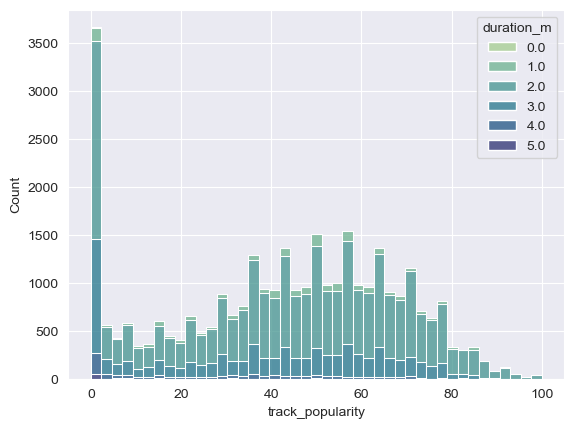

In [3]:
sns.histplot(data=data, x="track_popularity", hue="duration_m", multiple="stack",
             palette="crest")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='track_popularity', ylabel='Count'>

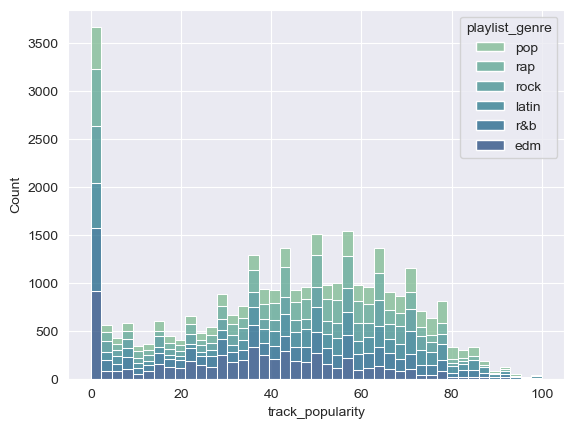

In [4]:
sns.histplot(data=data, x="track_popularity", hue="playlist_genre", multiple="stack",
             palette="crest")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Count'>

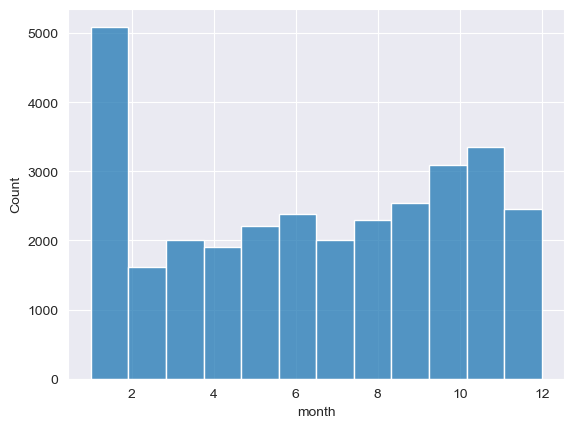

In [5]:
sns.histplot(data=data[data["month"] > 0], x="month", bins=12)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='playlist_genre', ylabel='Count'>

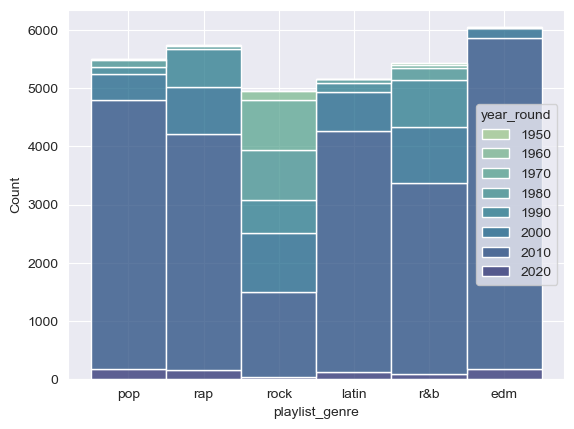

In [6]:
sns.histplot(data=data, x="playlist_genre", hue="year_round", multiple="stack", palette="crest")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

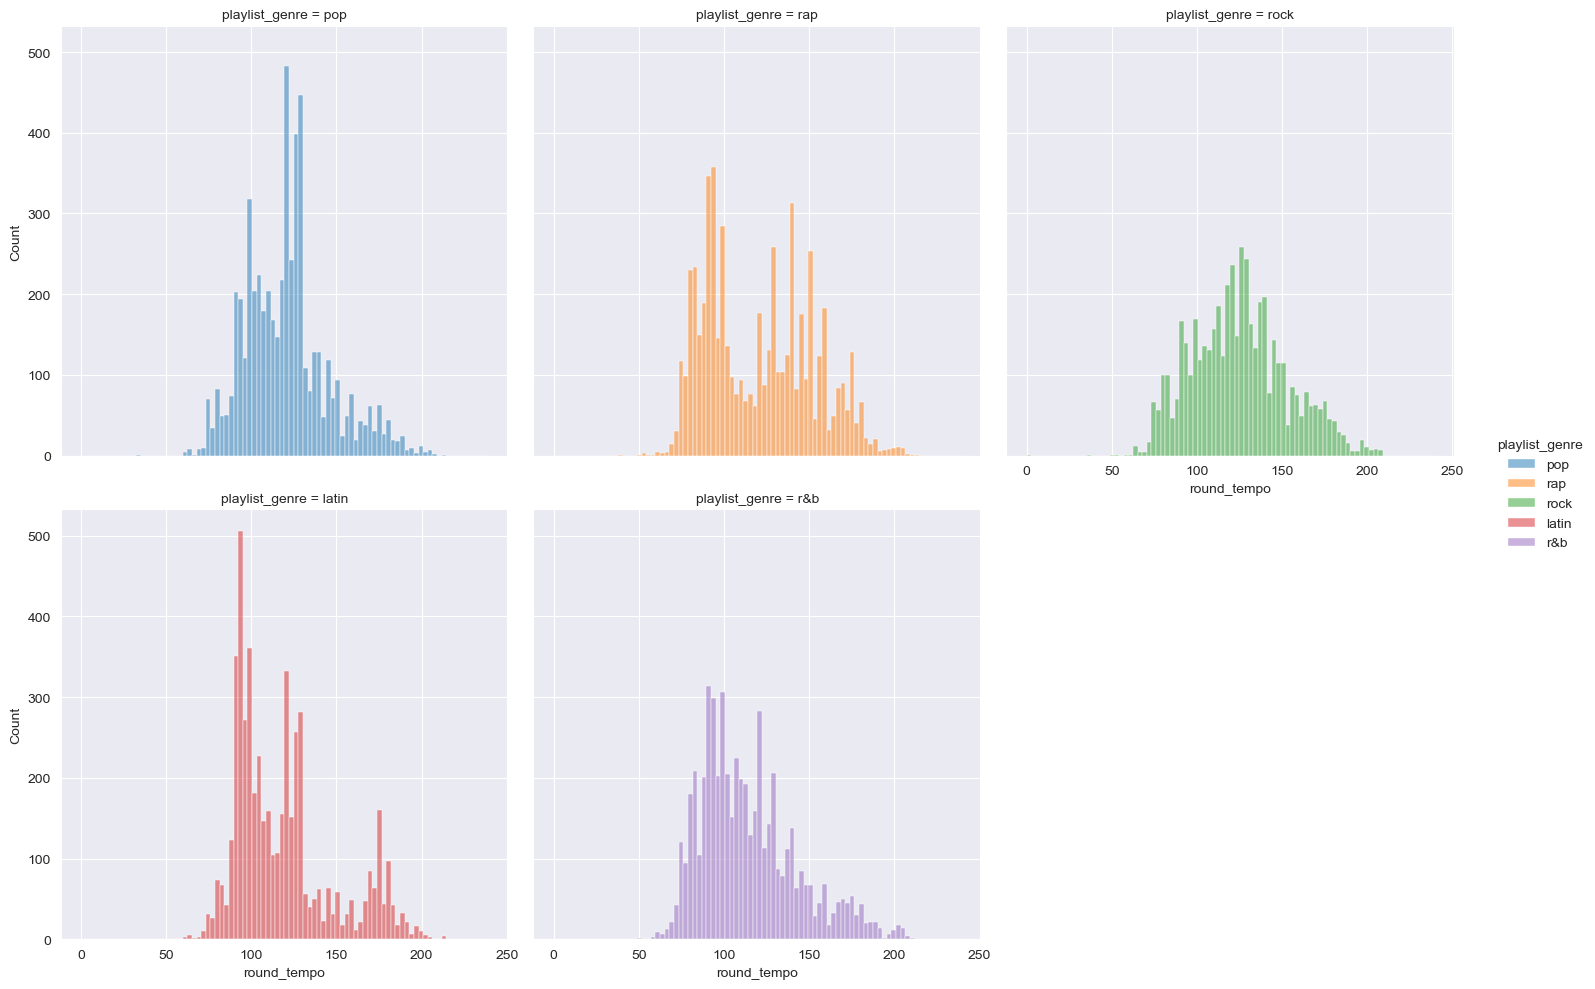

In [7]:
sns.displot(data=data[data["playlist_genre"] != "edm"], x="round_tempo", col="playlist_genre", hue="playlist_genre",
            col_wrap=3)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

<Axes: xlabel='playlist_genre', ylabel='Count'>

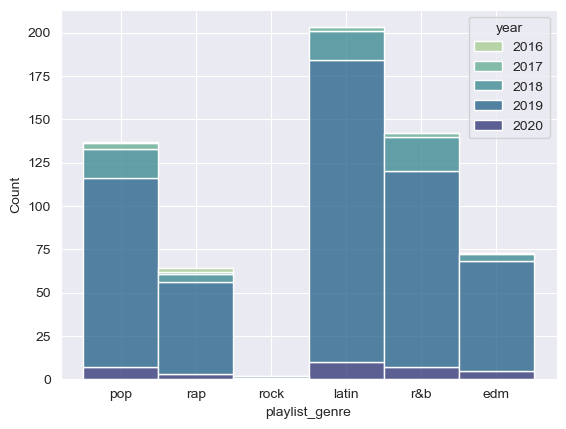

In [8]:
sns.histplot(data=data[(data["track_popularity"] > 85) & (data["year"] > 2000)], x="playlist_genre", hue="year",
             palette="crest", multiple="stack")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='duration_m%', ylabel='Count'>

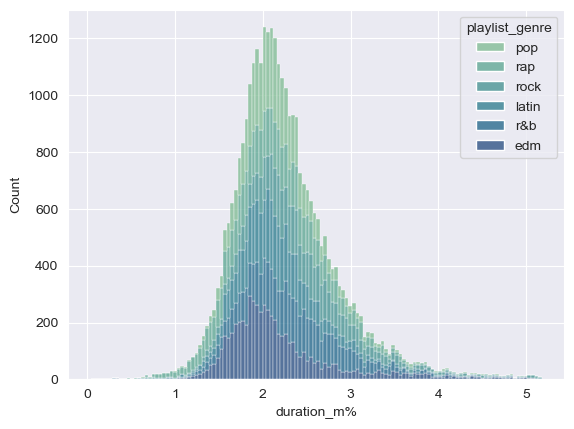

In [9]:
sns.histplot(data=data, x="duration_m%", hue="playlist_genre", multiple="stack", palette="crest")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playlist_subgenre', ylabel='Count'>

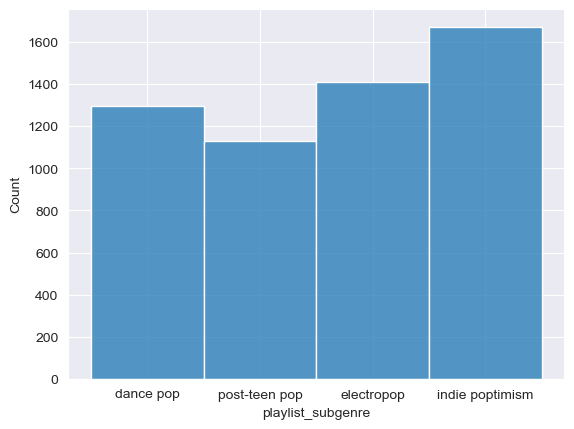

In [10]:
sns.histplot(data=data[data["playlist_genre"] == "pop"], x="playlist_subgenre")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playlist_subgenre', ylabel='Count'>

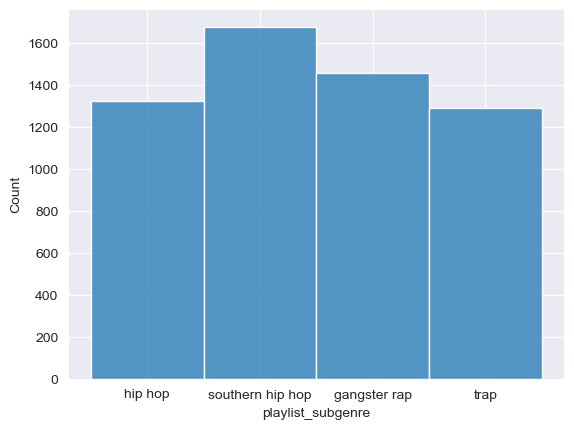

In [11]:
sns.histplot(data=data[data["playlist_genre"] == "rap"], x="playlist_subgenre")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='playlist_subgenre', ylabel='Count'>

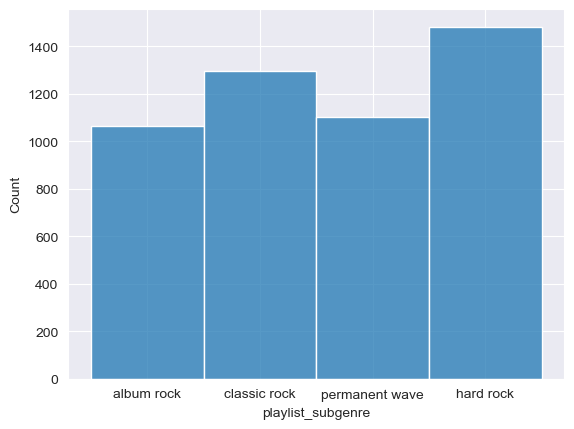

In [12]:
sns.histplot(data=data[data["playlist_genre"] == "rock"], x="playlist_subgenre")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

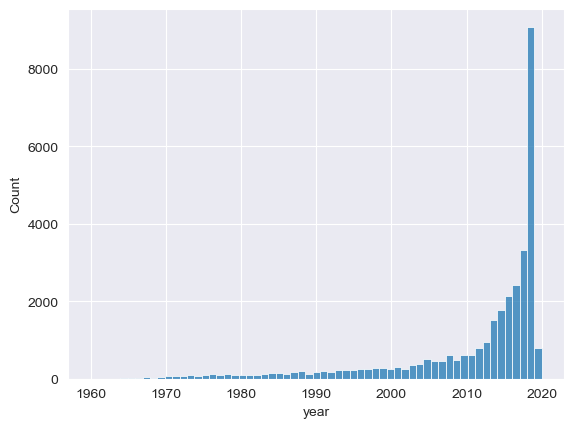

In [13]:
sns.histplot(data=data, x="year", binrange=(1960, 2020), bins=2021 - 1960)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

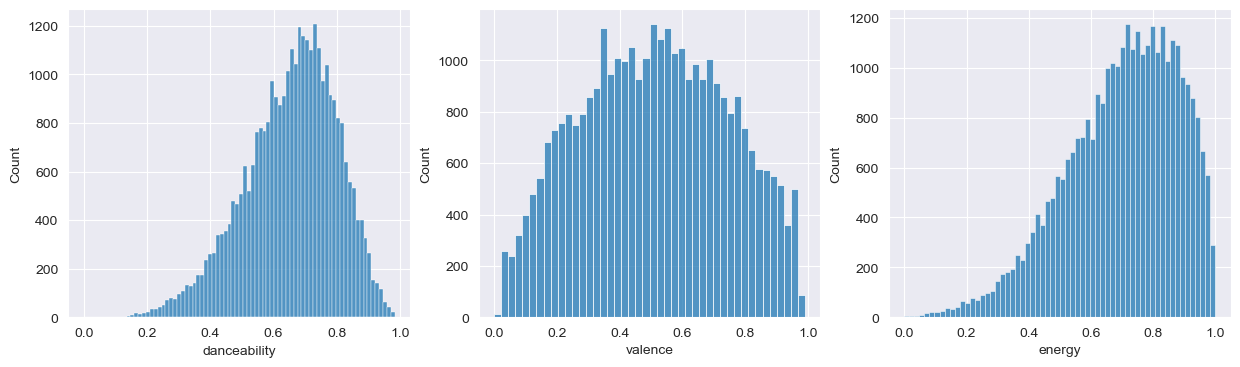

In [14]:
variables = ["danceability", "valence", "energy"]

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.histplot(data=data, x=variable, ax=axes[i])


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

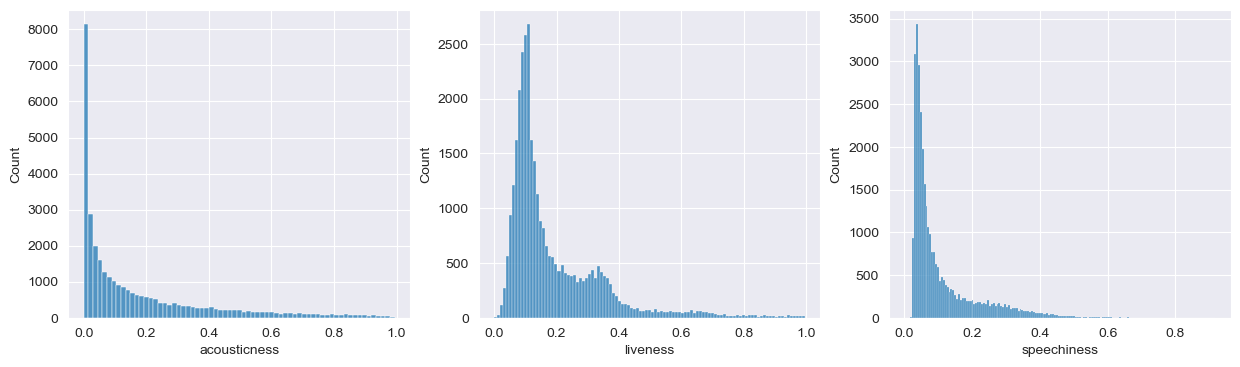

In [15]:
variables = ["acousticness", "liveness", "speechiness"]

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes = axes.flatten()

for i, variable in enumerate(variables):
    sns.histplot(data=data, x=variable, ax=axes[i])


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

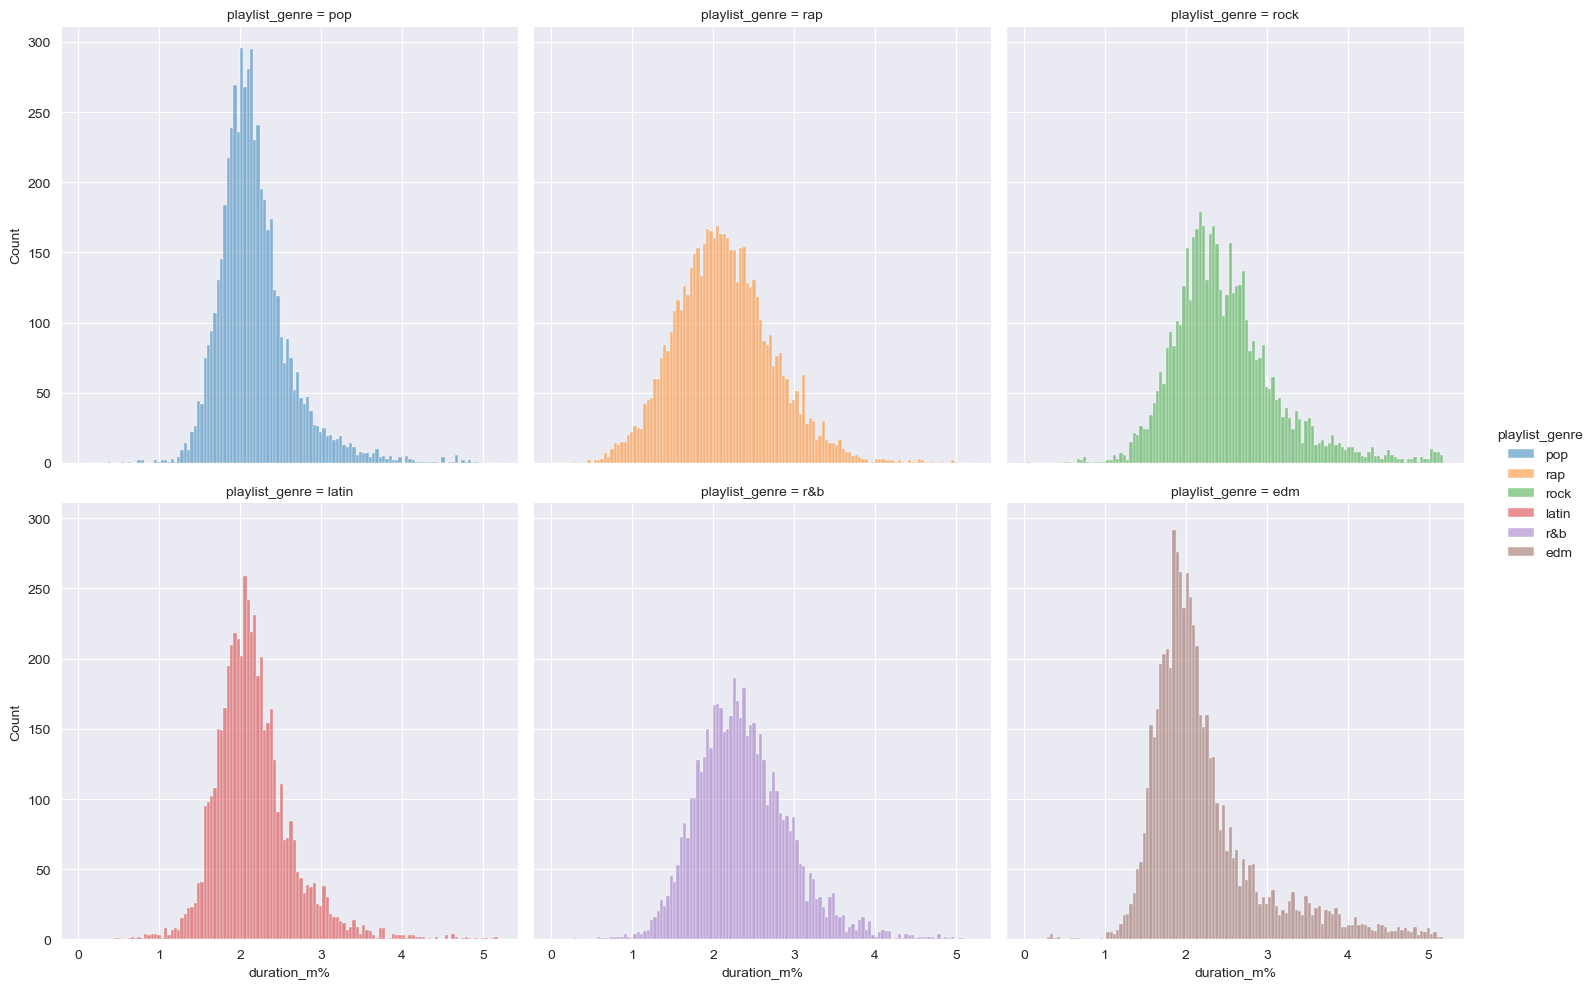

In [16]:
sns.displot(data=data, x="duration_m%", col="playlist_genre", hue="playlist_genre",
            col_wrap=3)

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='firstletter', ylabel='track_id'>

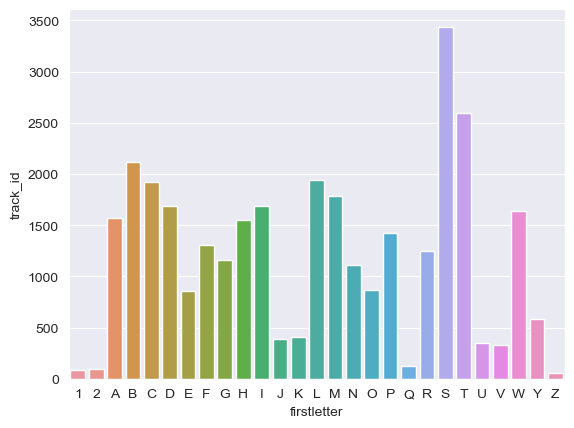

In [17]:
data["firstletter"] = data["track_name"].str.upper()
data["firstletter"] = data["firstletter"].str[0]

group = data.groupby("firstletter").count().reset_index()

sns.barplot(data=group[group["track_id"] > 50], x="firstletter", y="track_id")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='key_string', ylabel='track_id'>

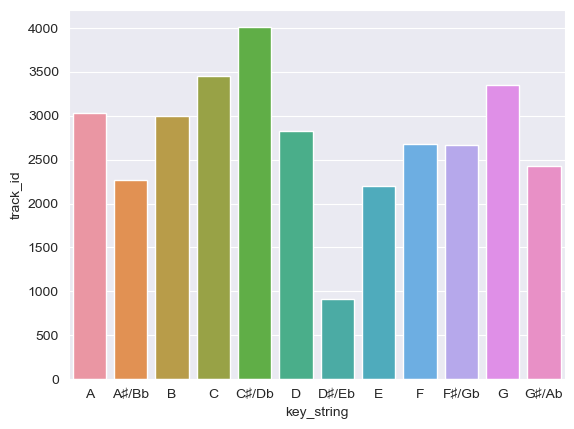

In [18]:
group = data.groupby("key_string").count().reset_index()

sns.barplot(data=group, x="key_string", y="track_id")

In [ ]:
all_names = ' '.join(data['track_name'].dropna())

words = all_names.lower().replace("(", "").replace(")", "").replace("-", "").replace(".", "").replace("&", "").split()

word_series = pd.Series(words)

word_counts = word_series.value_counts().reset_index()
word_counts.columns = ['Word', 'Count']
word_counts = word_counts[word_counts['Count'] > 800]

sns.barplot(data=word_counts, x="Word", y="Count")
word_counts[word_counts['Word'] == "Christmas"]

In [ ]:
all_names = ' '.join(data['playlist_name'].dropna())

words = all_names.lower().replace("(", "").replace(")", "").replace("-", "").replace(".", "").replace("&", "").replace(
    "/", "").replace("|", "").split()

word_series = pd.Series(words)

word_counts = word_series.value_counts().reset_index()
word_counts.columns = ['Word', 'Count']
word_counts = word_counts[word_counts['Count'] > 1800]

sns.barplot(data=word_counts, x="Word", y="Count")

In [ ]:
all_names = ' '.join(data['track_name'].dropna())

words = all_names.lower().replace("(", "").replace(")", "").replace("-", "").replace(".", "").replace("&", "").split()

word_series = pd.Series(words)

word_counts = word_series.value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

sns.barplot(data=word_counts[
    (word_counts['Word'] == "christmas") | (word_counts['Word'] == "snow") | (word_counts['Word'] == "snowman") | (
            word_counts['Word'] == "merry") | (word_counts['Word'] == "jingle") | (
            word_counts['Word'] == "santa")], x="Word",
            y="Count")